Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
%matplotlib inline

In [2]:
df = pd.read_csv("RELI Historical Data.csv")

In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Vol.'] = df['Vol.'].apply(lambda x: float(re.sub('M|B|K','',x)))
df['Change %'] = df['Change %'].apply(lambda x: float(re.sub('\%','',x)))
df['Price'] = df['Price'].apply(lambda x: float(re.sub(',', '', x)))
df['Open'] = df['Open'].apply(lambda x: float(re.sub(',', '', x)))
df['High'] = df['High'].apply(lambda x: float(re.sub(',', '', x)))
df['Low'] = df['Low'].apply(lambda x: float(re.sub(',', '', x)))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5000 non-null   datetime64[ns]
 1   Price     5000 non-null   float64       
 2   Open      5000 non-null   float64       
 3   High      5000 non-null   float64       
 4   Low       5000 non-null   float64       
 5   Vol.      5000 non-null   float64       
 6   Change %  5000 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 273.6 KB


In [5]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-02-10,2121.35,2137.92,2137.92,2107.41,4.98,-0.82
1,2023-02-09,2138.96,2136.60,2152.40,2118.94,6.08,0.17
2,2023-02-08,2135.24,2099.88,2142.46,2094.43,9.77,2.00
3,2023-02-07,2093.43,2098.97,2112.95,2081.72,6.99,-0.24
4,2023-02-06,2098.47,2101.69,2107.14,2093.34,6.85,-0.75
...,...,...,...,...,...,...,...
4995,2003-01-07,48.54,48.71,48.97,48.41,10.94,0.10
4996,2003-01-06,48.49,48.98,49.11,48.38,14.01,-1.10
4997,2003-01-03,49.03,50.25,50.29,48.88,20.98,-1.88
4998,2003-01-02,49.97,50.88,50.88,49.82,11.58,-1.46


In [6]:
df = df[::-1]

In [7]:
df.reset_index(drop = True,inplace=True)

In [8]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2003-01-01,50.71,51.22,51.34,50.59,13.67,-0.04
1,2003-01-02,49.97,50.88,50.88,49.82,11.58,-1.46
2,2003-01-03,49.03,50.25,50.29,48.88,20.98,-1.88
3,2003-01-06,48.49,48.98,49.11,48.38,14.01,-1.10
4,2003-01-07,48.54,48.71,48.97,48.41,10.94,0.10
...,...,...,...,...,...,...,...
4995,2023-02-06,2098.47,2101.69,2107.14,2093.34,6.85,-0.75
4996,2023-02-07,2093.43,2098.97,2112.95,2081.72,6.99,-0.24
4997,2023-02-08,2135.24,2099.88,2142.46,2094.43,9.77,2.00
4998,2023-02-09,2138.96,2136.60,2152.40,2118.94,6.08,0.17


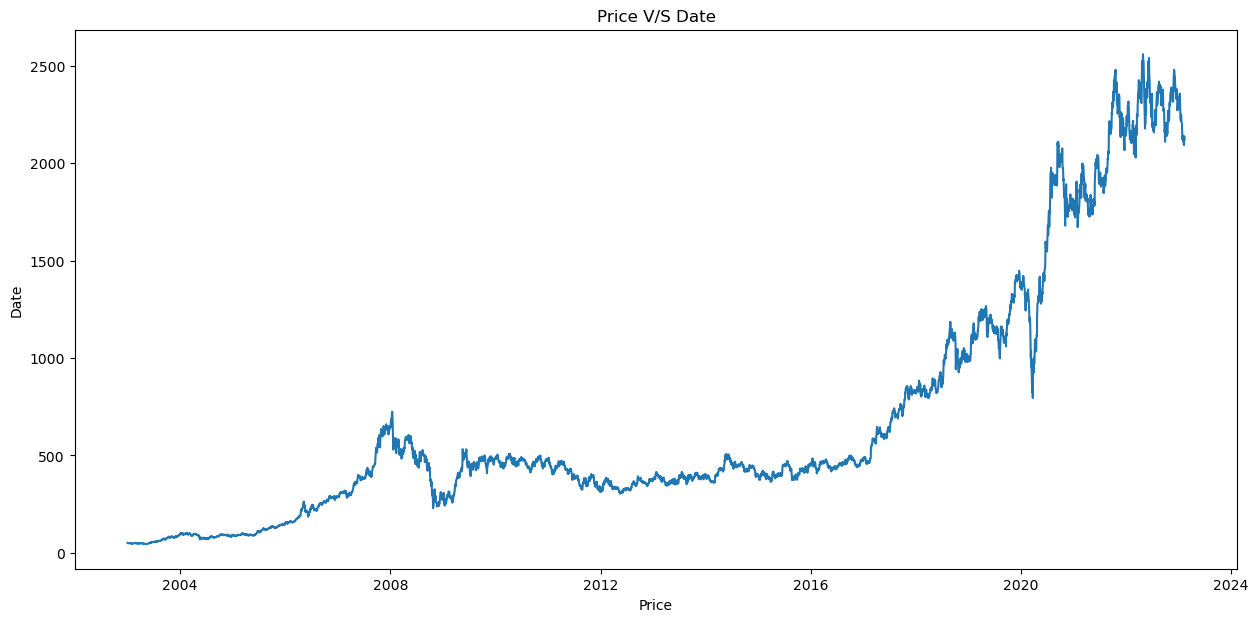

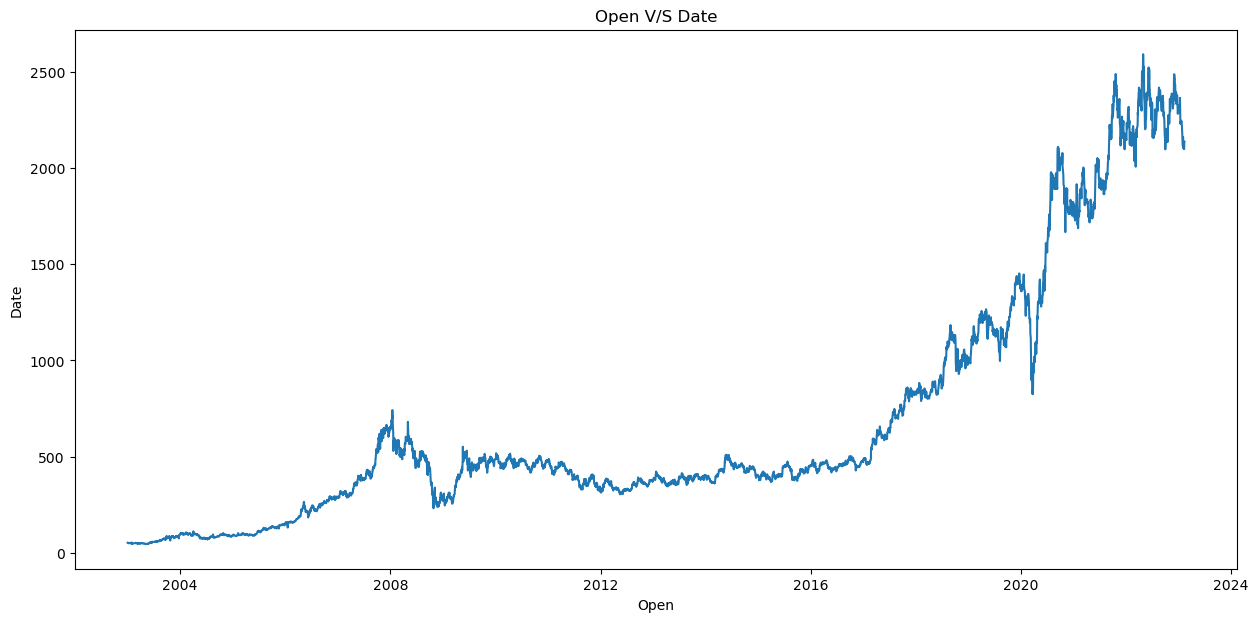

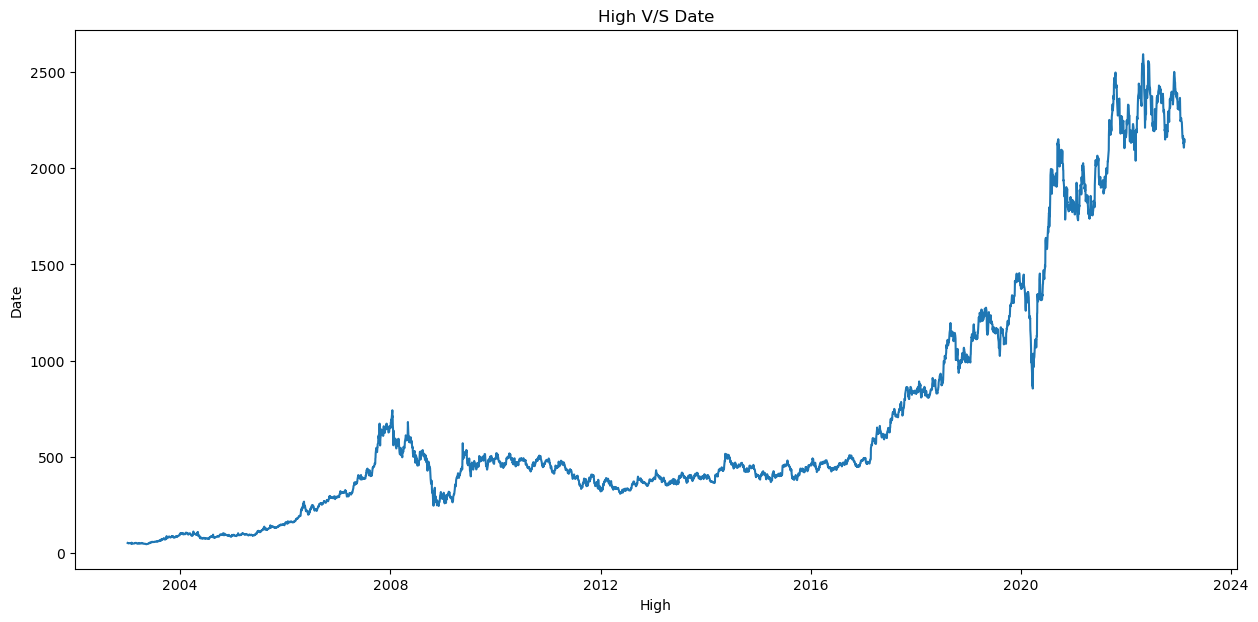

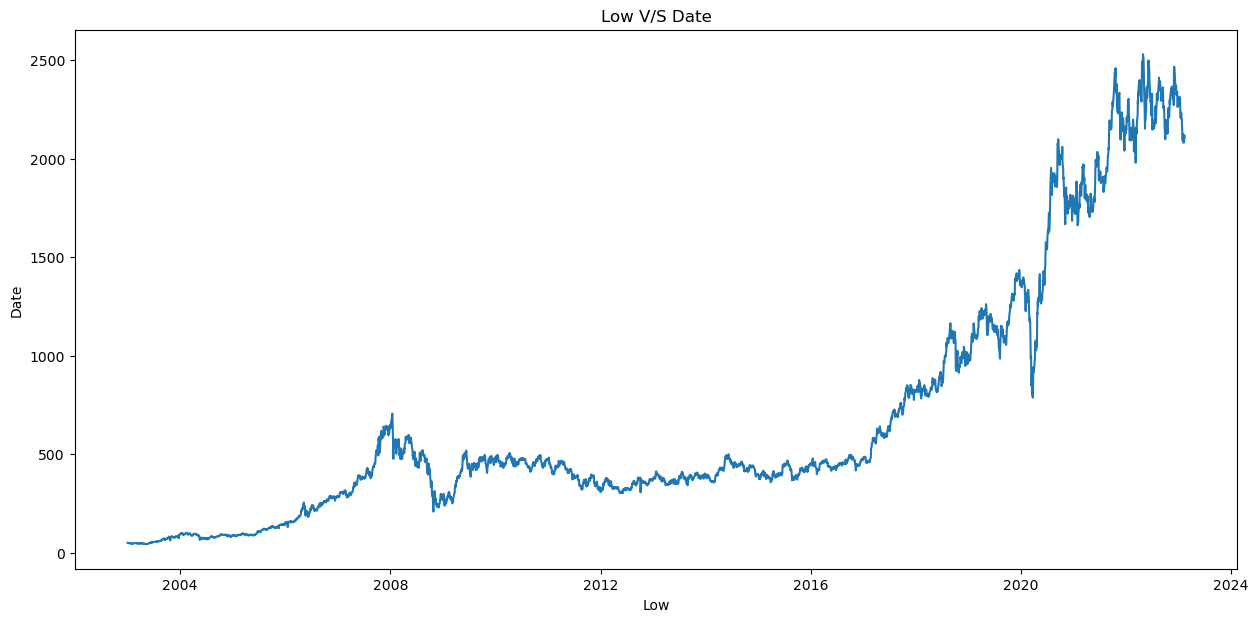

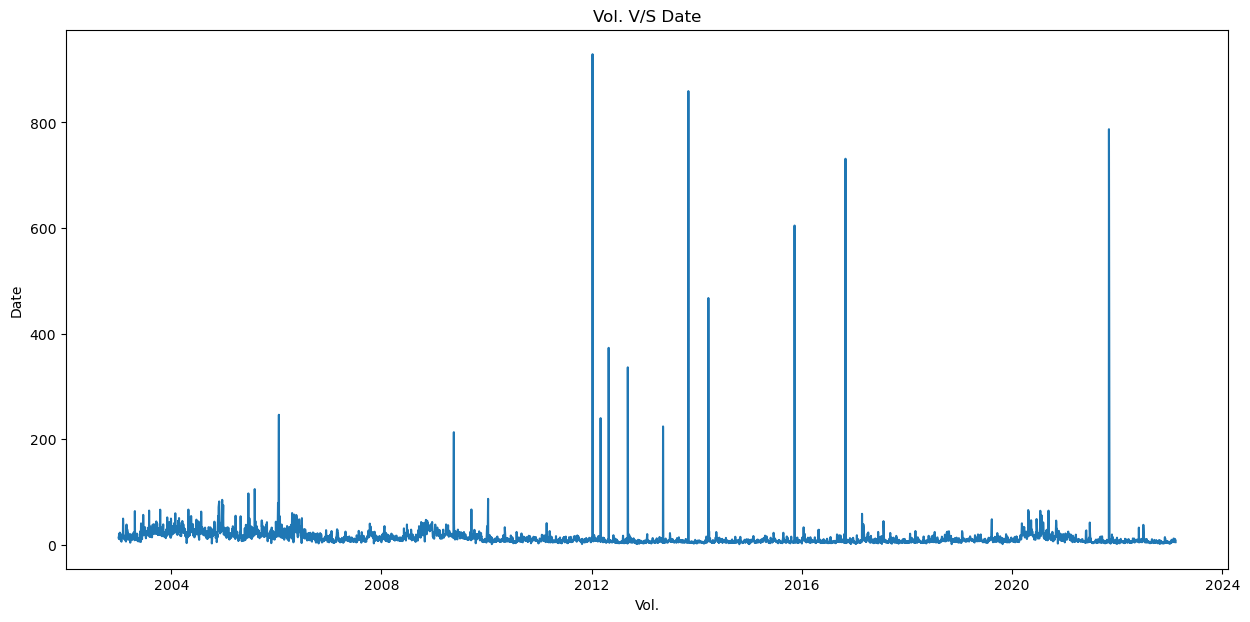

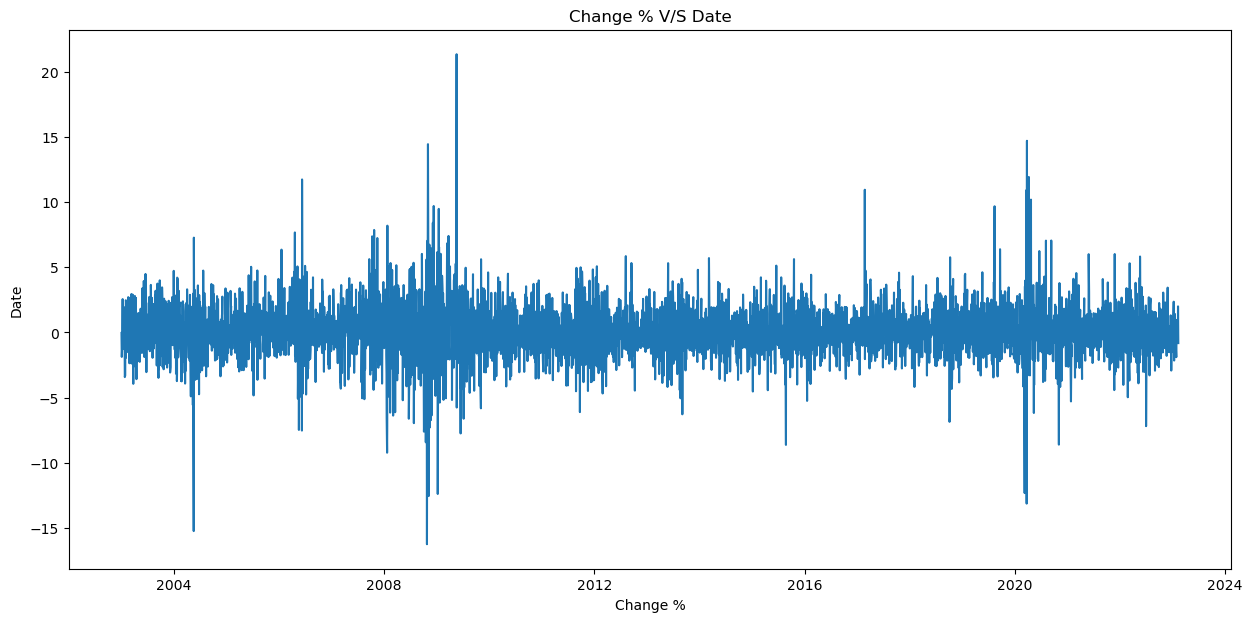

In [9]:
for i in df.columns:
    if i == 'Date':
        continue
    else:
        plt.figure(figsize=(15,7))
        plt.plot(df['Date'],df[i])
        plt.title(f"{i} V/S Date")
        plt.xlabel(i)
        plt.ylabel("Date")
        plt.show()
        

In [10]:
df.to_excel('Reliance_Monthly.xlsx')

In [11]:
df.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2013-01-12 10:41:05.280000,675.571898,676.243104,684.415700,667.406064,13.735110,0.095734
min,2003-01-01 00:00:00,44.190000,43.780000,44.760000,43.780000,1.140000,-16.270000
25%,2007-12-19 18:00:00,328.367500,328.635000,332.652500,324.155000,6.067500,-1.020000
50%,2013-01-07 12:00:00,442.380000,442.920000,447.400000,438.135000,9.235000,0.070000
75%,2018-01-24 06:00:00,828.635000,831.812500,838.495000,824.052500,15.897500,1.170000
max,2023-02-10 00:00:00,2560.030000,2592.980000,2592.980000,2529.390000,929.190000,21.370000
std,NaN,629.035634,629.584651,636.230322,622.441407,28.820876,2.046816


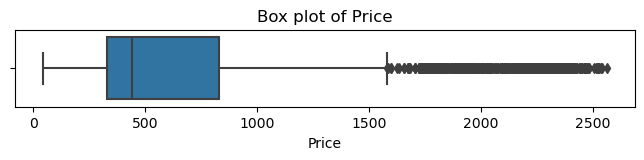

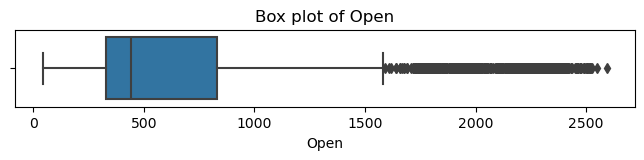

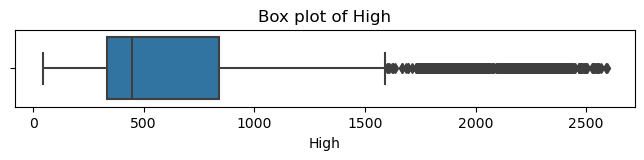

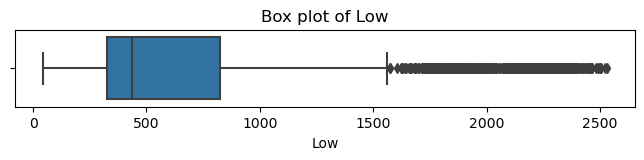

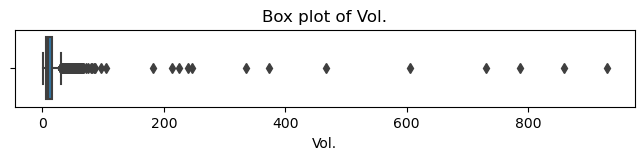

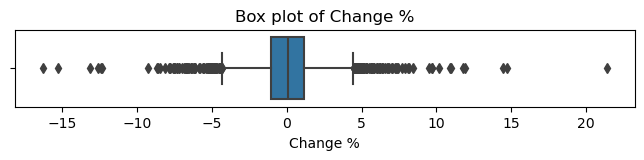

In [12]:
import seaborn as sns
for i in df.columns:
    if i=='Date':
        continue
    else:
        plt.figure(figsize=(8,1))
        sns.boxplot(x=df[i])
        plt.title(f"Box plot of {i}")
        plt.show()

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df = df.drop('Date', axis=1)

In [14]:
column_order = ['Year', 'Month', 'Day', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']
df = df[column_order]

In [15]:
from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [16]:
models = [
    ('linear regression', LinearRegression()),
    ('ElasticNet', ElasticNetCV()),
    ('KNN', KNeighborsRegressor()),
    ('AdaBoost', AdaBoostRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Extra Trees', ExtraTreesRegressor()),
    ('LightGBM', LGBMRegressor(verbose=-1)),
    ('CatBoost', CatBoostRegressor(logging_level='Silent')),  # Set logging_level to 'Silent' to avoid training progress output
    ('XGBoost', XGBRegressor()),
]

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['Price'])
y = df['Price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score, confusion_matrix, classification_report
import numpy as np

for model_name,model in models:
    pipe = Pipeline([
        ('Scaler',StandardScaler()),
        (model_name,model)
    ])
    print(model_name)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**(0.5)  
    r2 = r2_score(y_test, y_pred)

    print(f"MAE: {mae} | (MSE): {mse} | (RMSE): {rmse} | (R2 ): {r2}")

linear regression
MAE: 3.0891222543754573 | (MSE): 30.376486798322034 | (RMSE): 5.51148680469454 | (R2 ): 0.9999266032041
ElasticNet
MAE: 77.79043552330418 | (MSE): 12116.935103993252 | (RMSE): 110.076950829832 | (R2 ): 0.9707226112530233
KNN
MAE: 28.448648000000002 | (MSE): 1474.3256826399997 | (RMSE): 38.39694887149238 | (R2 ): 0.9964376795138502
AdaBoost
MAE: 34.51201935910203 | (MSE): 1691.0652852925264 | (RMSE): 41.122564186739694 | (R2 ): 0.9959139852339631
Gradient Boosting
MAE: 4.593468128098863 | (MSE): 53.36035986801286 | (RMSE): 7.3048175793795735 | (R2 ): 0.9998710687161294
Random Forest
MAE: 3.5679425000000102 | (MSE): 47.73656135592972 | (RMSE): 6.909165025958616 | (R2 ): 0.9998846571470206
Extra Trees
MAE: 3.084184200000025 | (MSE): 31.326284567419954 | (RMSE): 5.596988883982168 | (R2 ): 0.9999243082674449
LightGBM
MAE: 3.849605413668608 | (MSE): 61.18045035277438 | (RMSE): 7.821793295196081 | (R2 ): 0.9998521735229808
CatBoost
MAE: 4.758196138261403 | (MSE): 54.91140346

Linear Regression is the best fit model here

Pickle

In [19]:
import pickle
pickle.dump(pipe,open('model_lr.pkl','wb'))

In [20]:
pick = pickle.load(open('model_lr.pkl', 'rb'))

In [21]:
features = df.drop(columns=['Price'])
d = np.array([2019,2,1,1109.78,1188.20,1084.60,176.07,0.32]).reshape(1,-1)
prediction = pick.predict(d)
print(f"The predicted value is: {prediction}")

The predicted value is: [1159.9467]
